In [17]:
import networkx as nx
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

In [78]:
def hamiltonian(L, k, marked):
    H = L.copy().astype('complex')
    for x in marked:
        H[x,x] = H[x,x] - 1j*k 
    print(f"adjM:{H}")
    return H

def superposition(n, positions = None):
    if positions == None:
        state = np.ones([n,1])/np.sqrt(n)
    else:
        state = np.zeros([n,1])
        for x in positions:
            state[x] = 1
        state = state/np.sqrt(len(positions))
    
    return state
        
    
def evolution(H,t,initial):
    eigenvalues, eigenvectors = np.linalg.eig(H)
    specOp = eigenvectors @ np.diag(np.exp(-1j*eigenvalues*t)) @ eigenvectors.H
    return specOp @ initial
    # print(f"Spectral Operator: {specOp}")
    # print(f"operator time {np.matrix(expm(-1j*H*t))}")
    # return np.matrix(expm(-1j*H*t))@initial

def transport_efficiency(state):
    # print(f"final state {state}")
    # print(f"final state H {state.H}")
    statetMult = state @ state.H
    # print(f"state mult: {statetMult}")
    # print(f"state mult trace: {np.trace(statetMult)}")
    return 1 - np.trace(state @ state.H)

In [81]:
n = 10
k = 1
marked = [0]
t = 1

# G = nx.cycle_graph(n)
G = nx.complete_graph(n)
L = nx.laplacian_matrix(G).todense()

H = hamiltonian(L, k, marked)
initial = superposition(n,positions=[1])
print(initial)

adjM:[[ 9.-1.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j
  -1.+0.j]
 [-1.+0.j  9.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j
  -1.+0.j]
 [-1.+0.j -1.+0.j  9.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j
  -1.+0.j]
 [-1.+0.j -1.+0.j -1.+0.j  9.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j
  -1.+0.j]
 [-1.+0.j -1.+0.j -1.+0.j -1.+0.j  9.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j
  -1.+0.j]
 [-1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j  9.+0.j -1.+0.j -1.+0.j -1.+0.j
  -1.+0.j]
 [-1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j  9.+0.j -1.+0.j -1.+0.j
  -1.+0.j]
 [-1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j  9.+0.j -1.+0.j
  -1.+0.j]
 [-1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j  9.+0.j
  -1.+0.j]
 [-1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j
   9.+0.j]]
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


(-1.3922690186862683+0j)


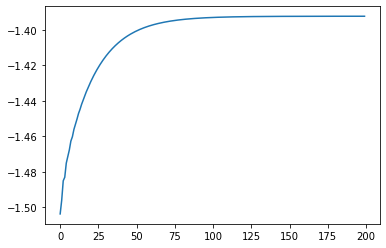

In [82]:
ti = 0
tf = 50
nt = 200
times = np.linspace(ti,tf,nt)
eta = []
for t in times:
    # print()
    # print(f"time = {t}")
    # print()
    eta.append(transport_efficiency(evolution(H,t,initial)))
    # print()
    # print("###################################################################################################")
    # print()

print(eta[-1])
plt.plot(eta)
plt.show()